# Python Statistics and Plotting Tutorial Jupyter Notebook

## BGSP 7030 - Natour

## Import Python Libraries and Tools

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import scipy as sp

In [4]:
import matplotlib.pyplot as plt

In [5]:
import sys

In [6]:
import os

In [7]:
from pandas import plotting as pdplt

## Import dataset and interpret CSV data into a readable table with columns and data; then visualize the data

In [8]:
data = pd.read_csv('brain_size.csv', sep=';', na_values=".")

## Create an array of data; linspace = creating a data set of numbers that runs from -6 to +6;  

In [9]:
t = np.linspace(-6, 6, 20)

## Caculate the sine value and the cosine value

In [10]:
sin_t = np.sin(t)

In [11]:
cos_t = np.sin(t)

## Compile all the data into a array and visualize the data

In [12]:
lindata = pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t}) 

## Pull information about the data that was imported; Number of Entries and Columns

In [13]:
data.shape

(40, 8)

## Pull information about the column names within the csv data

In [14]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

## Visualize the specific data from the Column "Gender"

## Caclulate the mean of the VIQ where the column gender states 'Female'

In [15]:
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

## Use Groupby commands to pull and analyze data about the dataframe array/table to make calculations

In [16]:
groupby_gender = data.groupby('Gender')

In [17]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [18]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Plotting Matrix Data - Weight, Height, MRI_Cout

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

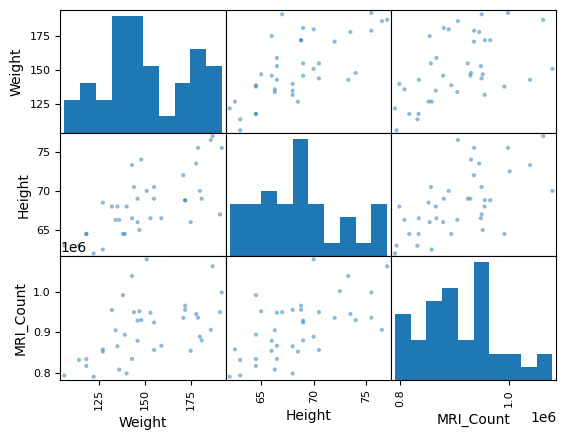

In [19]:
pdplt.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

## Plotting Matrix Data - Weight, Height, MRI_Cout

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

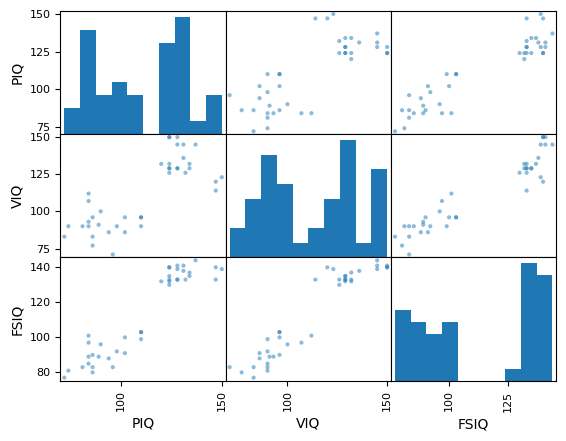

In [20]:
pdplt.scatter_matrix(data[['PIQ','VIQ','FSIQ']])

## Statistical data comparing various parts of the data set

In [21]:
from scipy import stats

In [22]:
stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=30.08809997084933, pvalue=1.3289196468727879e-28, df=39)

In [23]:
female_viq = data[data['Gender'] == 'Female']['VIQ']

In [24]:
male_viq = data[data['Gender'] == 'Male']['VIQ']

In [25]:
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

## Can run different types of t-tests that compare data in different ways

In [26]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

In [27]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

In [28]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

## Unsure of this error, maybe there's a variable I'm missing?)

In [29]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

/srv/conda/envs/notebook/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

# Linear Modeling, Multiple FActors, and AOV analysis

## numpy and panda already imported

In [30]:
x = np.linspace(-5, 5, 20)

In [31]:
np.random.seed(1)

## normal distributed noise

In [32]:
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

## Create a data frame containing all the relevant variables

In [33]:
data2 = pd.DataFrame({'x': x, 'y': y})

## Pull the OLS Model to create a linear fit model

In [34]:
import statsmodels.api

In [35]:
from statsmodels.formula.api import ols

In [36]:
model1 = ols("y ~ x", data2).fit()

In [37]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           8.56e-08
Time:                        02:25:24   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Modeling Brain Size Data - data = brain size data, data2 = ran gen data

In [38]:
model2 = ols("VIQ ~ Gender + 1", data).fit()

In [39]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 20 Jul 2023   Prob (F-statistic):              0.445
Time:                        02:25:29   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [40]:
data_fsiq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'FSIQ'})

In [41]:
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'PIQ'})

In [42]:
data_long = pd.concat((data_fsiq, data_piq))

In [43]:
print(data_long)

     iq  type
0   133  FSIQ
1   140  FSIQ
2   139  FSIQ
3   133  FSIQ
4   137  FSIQ
..  ...   ...
35  128   PIQ
36  124   PIQ
37   94   PIQ
38   74   PIQ
39   89   PIQ

[80 rows x 2 columns]


In [44]:
model3 = ols("iq ~ type", data_long).fit()

In [45]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 20 Jul 2023   Prob (F-statistic):              0.643
Time:                        02:25:37   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [46]:
sp.stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

# Creating multiple factor regression models

## Some example data first

In [47]:
data3 = pd.read_csv('iris.csv')

In [48]:
model3 = ols('sepal_width ~ name + petal_length', data3).fit()

In [49]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           1.58e-20
Time:                        02:25:46   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [50]:
print(model3.f_test([0, 1, -1, 0]))

<F test: F=3.2453353465743175, p=0.07369058781700577, df_denom=146, df_num=1>


# Wage Data Visualization using Seaborn

In [51]:
import os

In [52]:
import urllib

## Import Text File from url

In [53]:
if not os.path.exists('wages.txt'):
    #Pull file if not already present on drive
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages','wages.txt')

# Assign Column Names

In [54]:
names = [     
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

In [55]:
short_names = [n.split(':')[0] for n in names]

In [65]:
wages = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, engine='python', sep=None, header=None)

In [66]:
wages.columns = short_names

In [67]:
wages

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,5.10,35,2,6,1,1
1,9,0,1,42,0,4.95,57,3,6,1,1
2,12,0,0,1,0,6.67,19,3,6,1,0
3,12,0,0,4,0,4.00,22,3,6,0,0
4,12,0,0,17,0,7.50,35,3,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
529,18,0,0,5,0,11.36,29,3,5,0,0
530,12,0,1,33,0,6.10,51,1,5,0,1
531,17,0,1,25,1,23.25,48,1,5,0,1
532,12,1,0,13,1,19.88,31,3,5,0,1


In [68]:
# Transform Wage Data into multiplicative factors via log10 transormation
import numpy as np
wages['WAGE'] = np.log10(wages['WAGE'])

In [69]:
wages

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
529,18,0,0,5,0,1.055378,29,3,5,0,0
530,12,0,1,33,0,0.785330,51,1,5,0,1
531,17,0,1,25,1,1.366423,48,1,5,0,1
532,12,1,0,13,1,1.298416,31,3,5,0,1


## Using Seaborn - plot multiple plots showing the relationship between a number of the different categories in the dataset.

# Plotting scatter matrices for the different data sets in the set

In [70]:
import seaborn

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'All Categories Coupled Together')

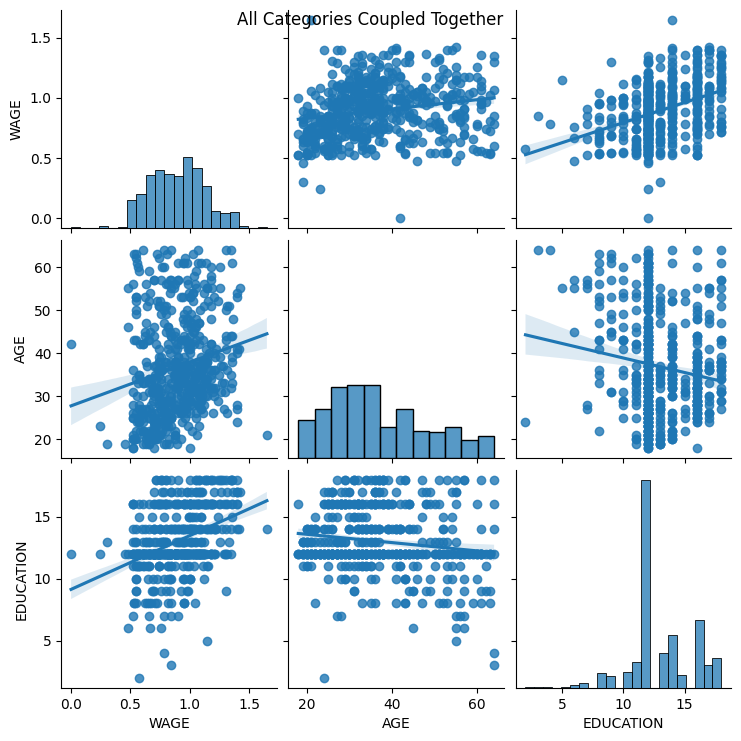

In [72]:
seaborn.pairplot(wages, vars=['WAGE', 'AGE', 'EDUCATION'], 
                 kind='reg')
plt.suptitle('All Categories Coupled Together')

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Effect of Sex: 1=Female, 0=Male')

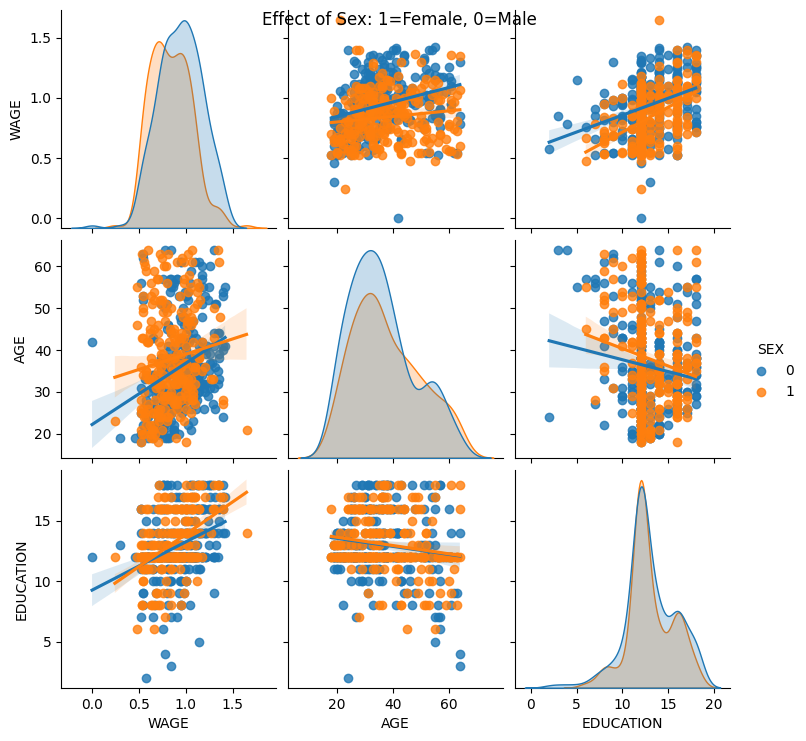

In [73]:
seaborn.pairplot(wages, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX')
plt.suptitle('Effect of Sex: 1=Female, 0=Male')

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Effect of race: 1=Other, 2=Hispanic, 3=White')

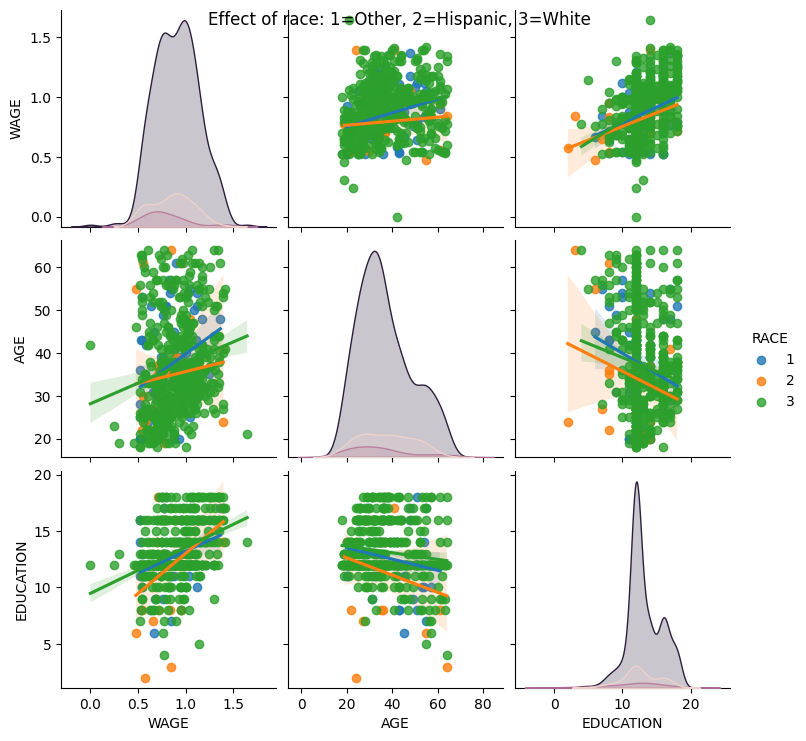

In [74]:
seaborn.pairplot(wages, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='RACE')

plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Effect of Union Membership: 1=Union Member, 0=Non Union Member')

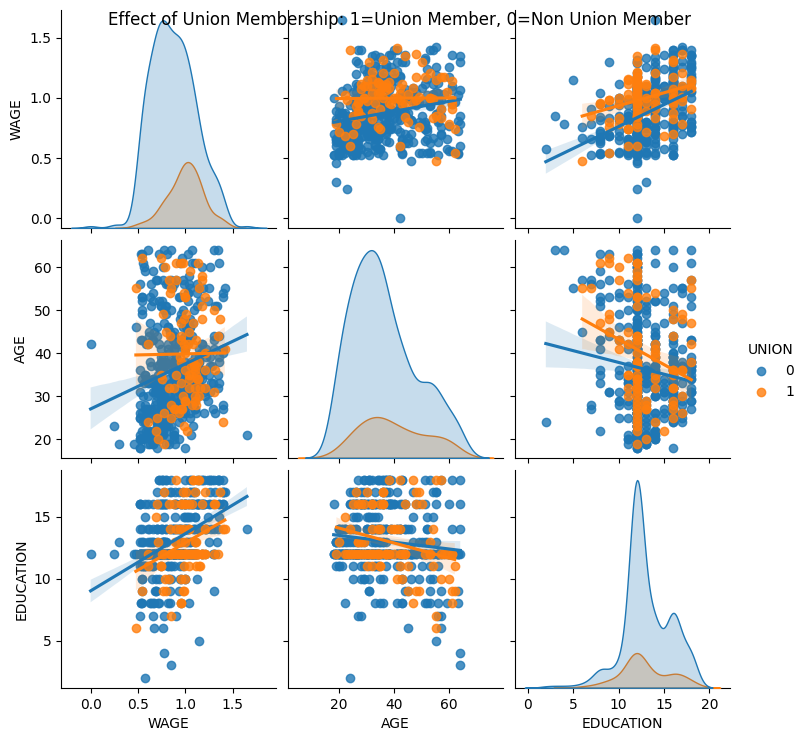

In [75]:
seaborn.pairplot(wages, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='UNION')

plt.suptitle('Effect of Union Membership: 1=Union Member, 0=Non Union Member')

## Using Seaborn to visualize a linear regression model

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Relationship of Wage and Education (in Years)')

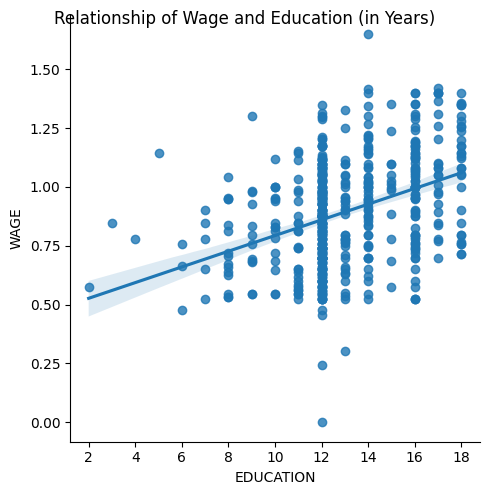

In [76]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=wages)
plt.suptitle('Relationship of Wage and Education (in Years)')

In [77]:
result = statsmodels.formula.api.ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX', 
                data=wages).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           2.94e-25
Time:                        02:31:02   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861